# Result Visualization Notebook

This notebook visualizes the results of our LLM-based social network simulation.

In [1]:
import json
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter

%matplotlib inline
plt.style.use('seaborn')

## Load Analysis Results

In [18]:
with open('../data/simulation_results_20240905_230505/analysis/centrality.json', 'r') as f:
    centrality = json.load(f)

with open('../data/simulation_results_20240905_230505/analysis/communities.json', 'r') as f:
    communities = json.load(f)

with open('../data/simulation_results_20240905_230505/analysis/influencers.json', 'r') as f:
    influencers = json.load(f)

with open('../data/simulation_results_20240905_230505/analysis/engagement_rates.json', 'r') as f:
    engagement_rates = json.load(f)

with open('../data/simulation_results_20240905_230505/analysis/influencer_trends.json', 'r') as f:
    influencer_trends = json.load(f)

## Visualize Centrality Distribution

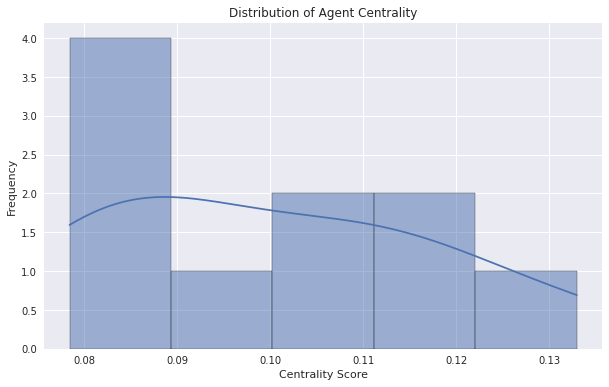

In [19]:
plt.figure(figsize=(10, 6))
sns.histplot(list(centrality.values()), kde=True)
plt.title("Distribution of Agent Centrality")
plt.xlabel("Centrality Score")
plt.ylabel("Frequency")
plt.show()

## Visualize Community Sizes

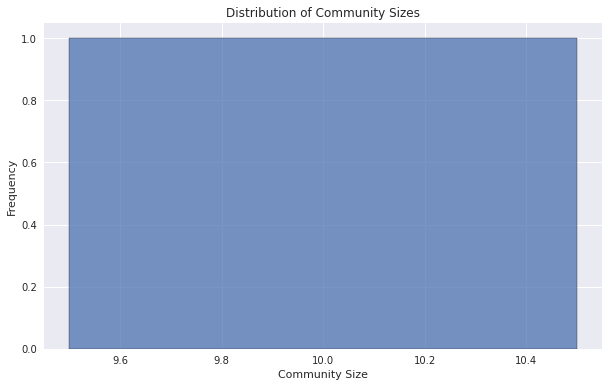

Number of communities: 1
Average community size: 10.00


In [20]:
community_sizes = [len(c) for c in communities]

plt.figure(figsize=(10, 6))
sns.histplot(community_sizes, kde=False, discrete=True)
plt.title("Distribution of Community Sizes")
plt.xlabel("Community Size")
plt.ylabel("Frequency")
plt.show()

print(f"Number of communities: {len(communities)}")
print(f"Average community size: {sum(community_sizes) / len(communities):.2f}")

## Analyze Influencers

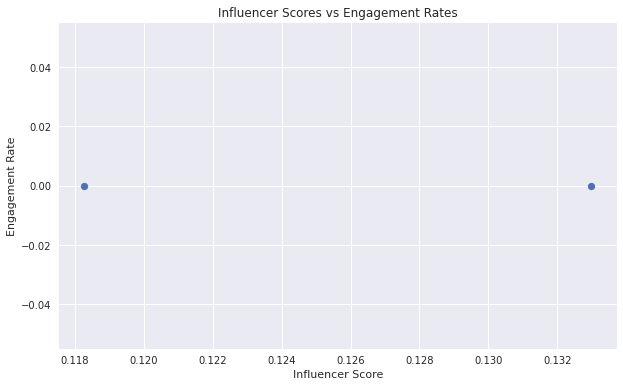

Number of identified influencers: 2
Average influencer score: 0.1256
Average engagement rate: 0.0000


In [21]:
plt.figure(figsize=(10, 6))
plt.scatter(list(influencers.values()), list(engagement_rates.values()))
plt.title("Influencer Scores vs Engagement Rates")
plt.xlabel("Influencer Score")
plt.ylabel("Engagement Rate")
plt.show()

print(f"Number of identified influencers: {len(influencers)}")
print(f"Average influencer score: {sum(influencers.values()) / len(influencers):.4f}")
print(f"Average engagement rate: {sum(engagement_rates.values()) / len(engagement_rates):.4f}")

## Visualize Influencer Trends

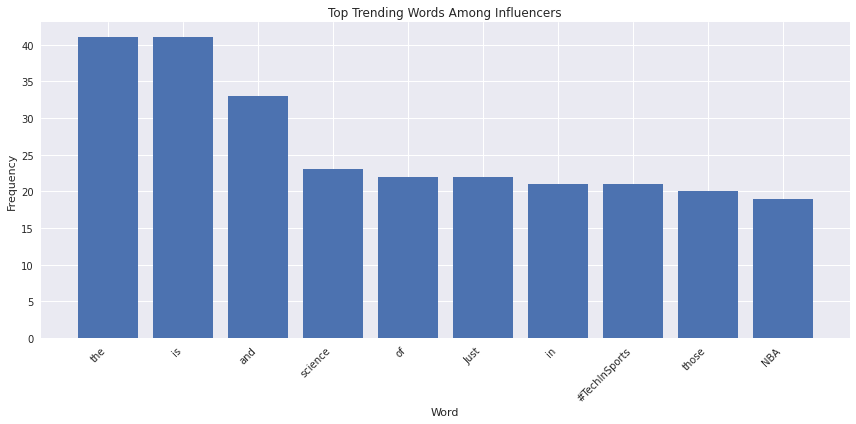

In [22]:
trend_words, trend_counts = zip(*influencer_trends)

plt.figure(figsize=(12, 6))
plt.bar(trend_words, trend_counts)
plt.title("Top Trending Words Among Influencers")
plt.xlabel("Word")
plt.ylabel("Frequency")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()